In [1]:
import pickle
import numpy as np
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('indian_liver_patient.csv', sep=',')
data
# data.info()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Non Liver
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,Liver
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,Liver
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,Liver


In [3]:
# showing column wise %ge of NaN values they contains
null_col = []
for i in data.columns:
  print(i,"\t-\t", data[i].isna().mean()*100)
  if data[i].isna().mean()*100 > 0:
    null_col.append(i)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.6861063464837049
Dataset 	-	 0.0


In [4]:
for i in null_col:
  data[i] = data[i].fillna(data[i].mean())

# lets check for null values again
for i in data.columns:
  print(i,"\t-\t", data[i].isna().mean()*100)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.0
Dataset 	-	 0.0


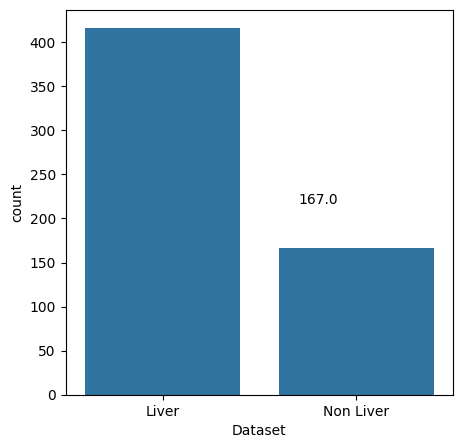

In [5]:
# Checking for unbalanced dataset

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=data)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [6]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(data.drop(['Dataset'], axis=1), data['Dataset'])

new_df = pd.DataFrame(x, columns=data.drop(['Dataset'], axis=1).columns)
new_df['Dataset'] = y

new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver


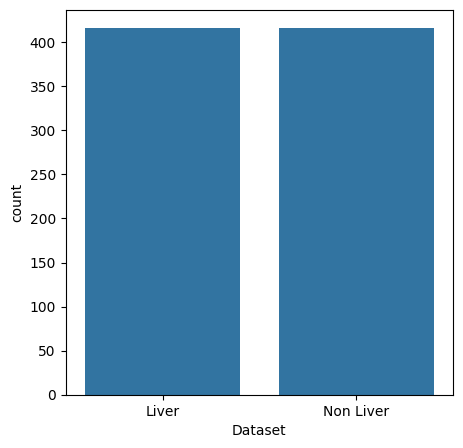

In [7]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [8]:
new_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver
...,...,...,...,...,...,...,...,...,...,...,...
827,49,Male,0.7,0.1,148,14,12,5.4,2.8,1.00,Non Liver
828,24,Female,0.9,0.2,195,40,35,7.4,4.1,1.20,Non Liver
829,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,Non Liver
830,49,Female,0.6,0.1,185,17,26,6.6,2.9,0.70,Non Liver


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    object 
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
 10  Dataset                     832 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 71.6+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df['Gender'] = enc.fit_transform(new_df['Gender'].astype('str'))

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df['Dataset'] = enc.fit_transform(new_df['Dataset'].astype('str'))

In [12]:
new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [13]:
for i in new_df.select_dtypes(include=['object']).columns:
  new_df[i] = new_df[i].astype(object).astype(float)

<Axes: >

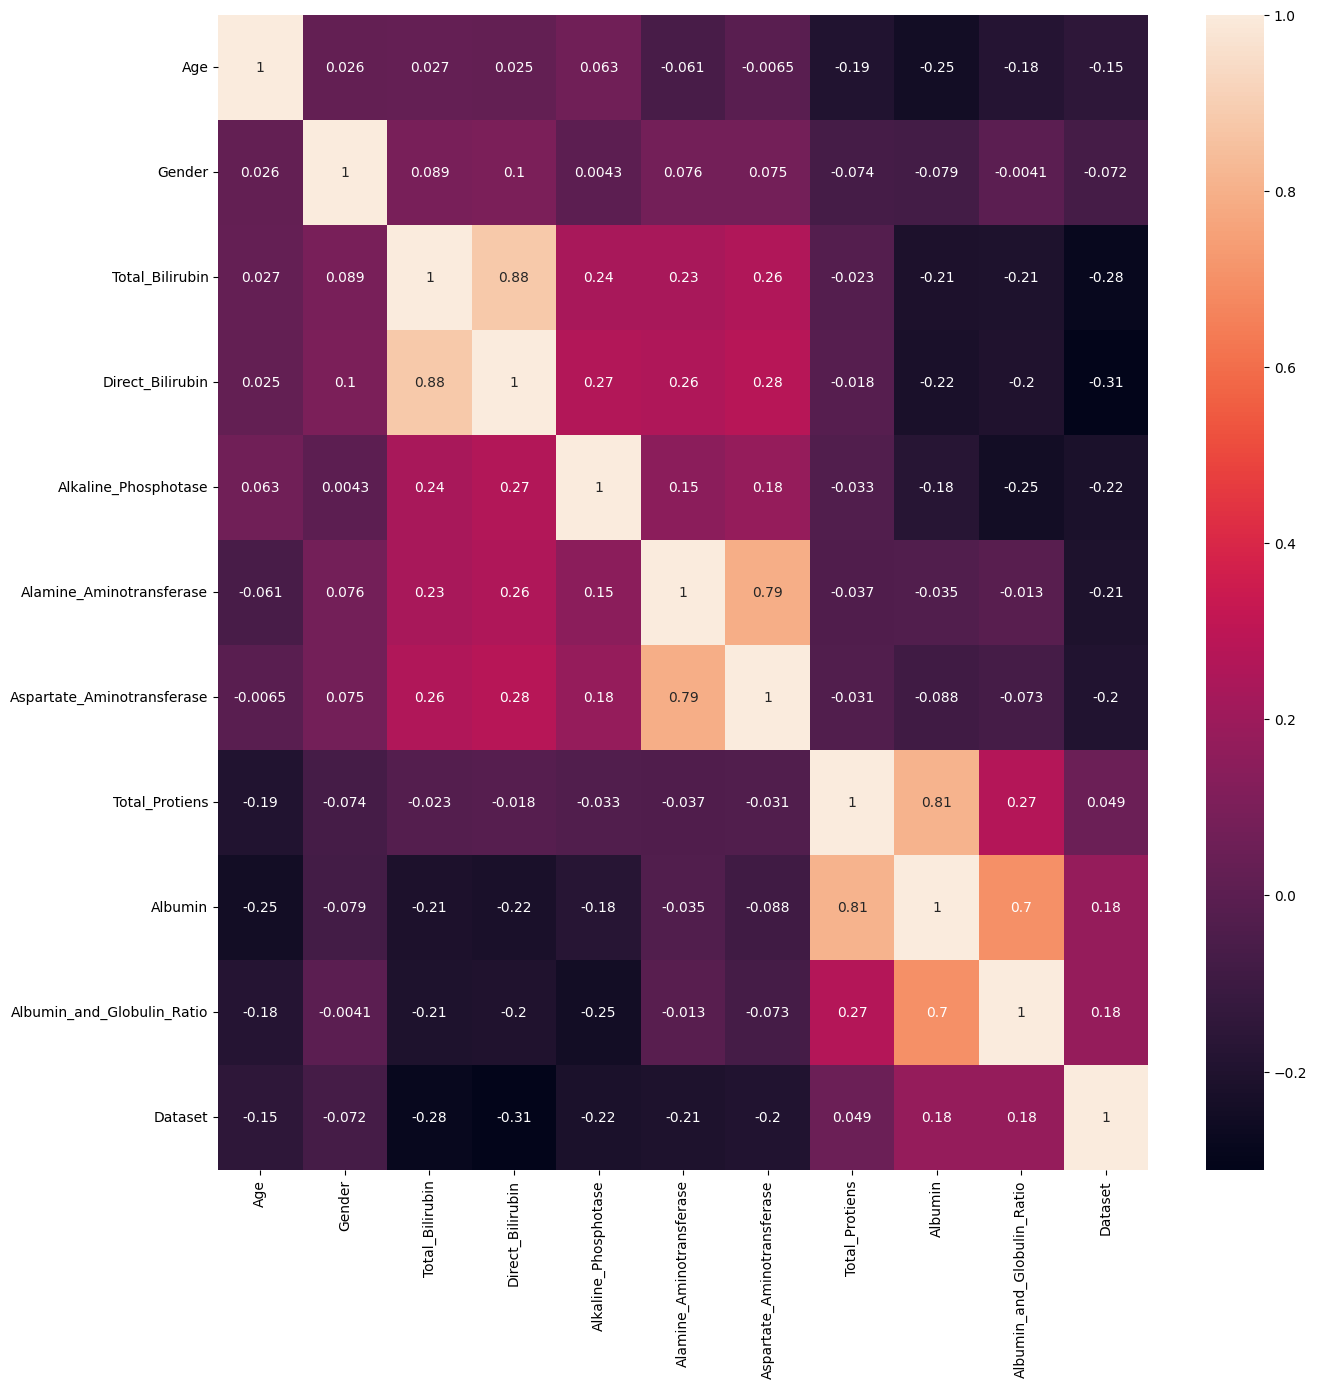

In [14]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

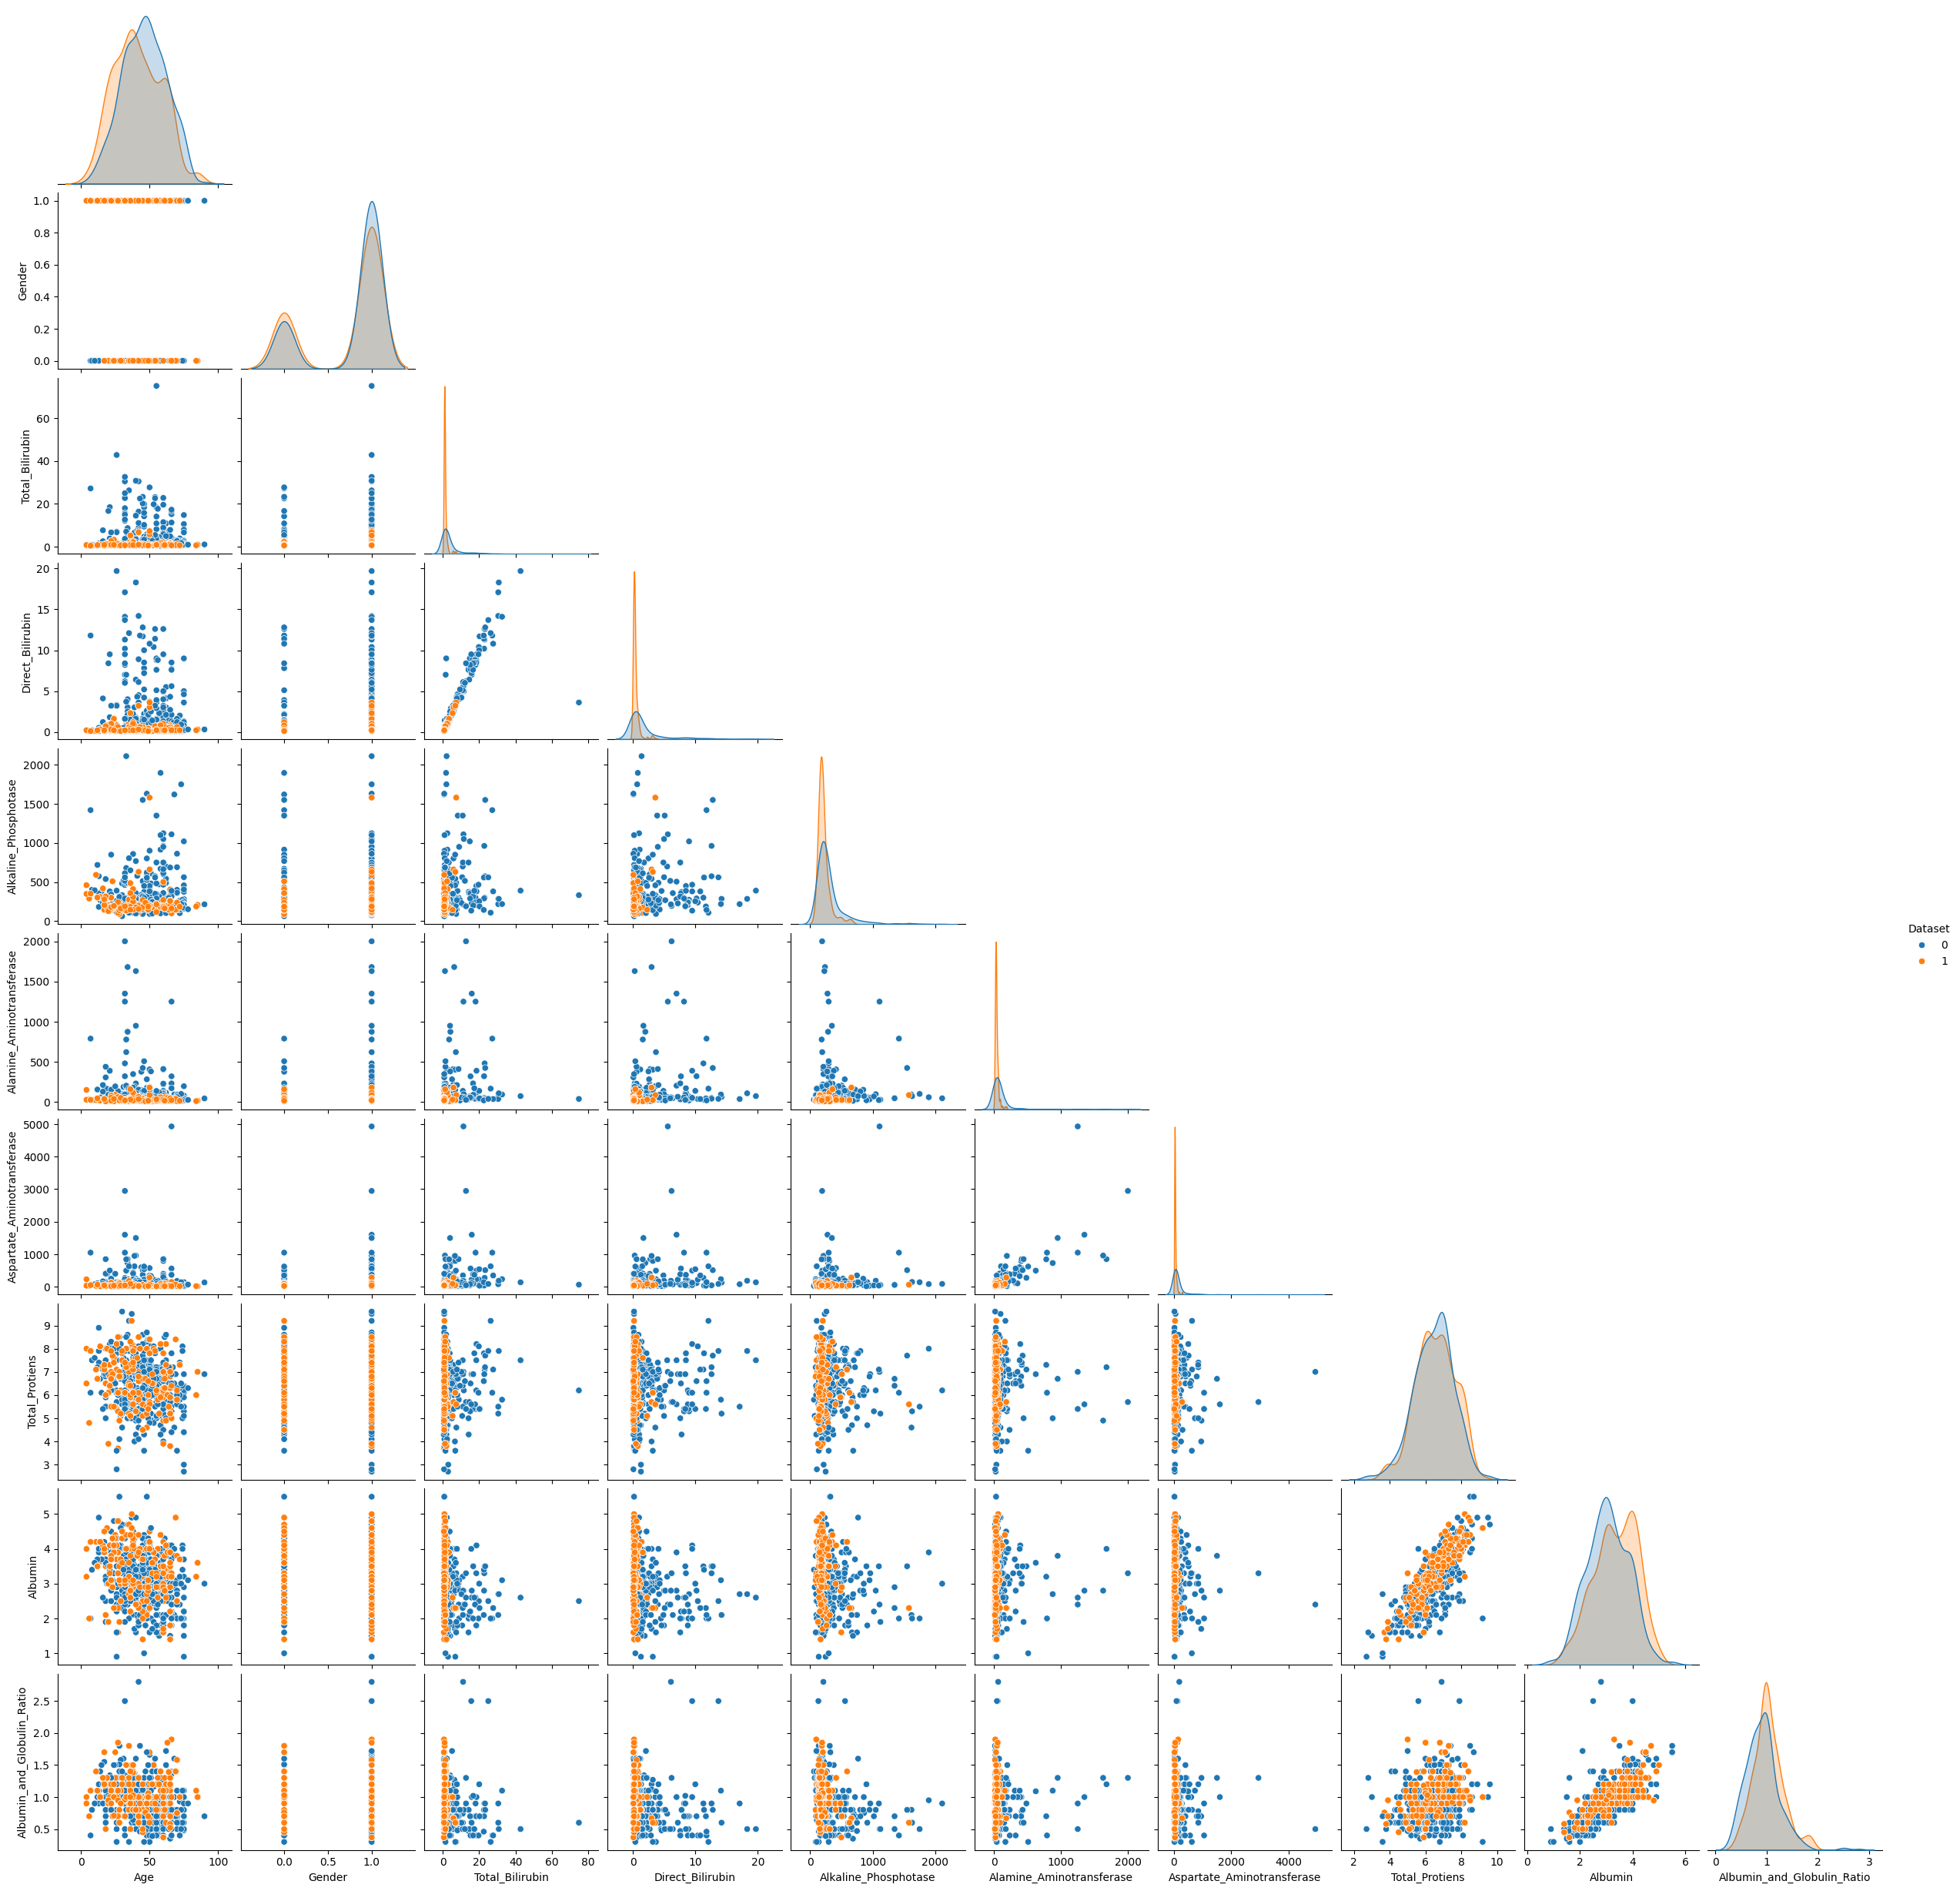

In [15]:
sns.pairplot(data=new_df, hue='Dataset', corner=True)

KNN

In [16]:
X = new_df.drop(['Dataset'], axis=1)
y = new_df['Dataset']

In [17]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.284218,-1.721019,-0.370792,-0.442382,-0.387958,-0.331427,-0.292848,0.263002,0.117711,-0.225135
1,1.103346,0.581051,1.548273,1.790803,1.961676,-0.021526,0.042431,0.904695,-0.005789,-0.736599
2,1.103346,0.581051,0.870956,1.211829,1.002548,-0.047351,-0.088410,0.446343,0.117711,-0.257102
3,0.862184,0.581051,-0.314349,-0.318316,-0.410904,-0.344339,-0.284670,0.263002,0.241211,0.094530
4,1.706252,0.581051,0.231267,0.343368,-0.351245,-0.260408,-0.125209,0.721354,-0.993790,-1.823459


In [18]:
# AMBIL LABEL SETIAP BARIS
label = new_df.iloc[:,-1:].values.ravel()
label

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [19]:
# AMBIL FEATURE DATA
feature = new_df.iloc[:,:-1]
feature.values

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [36.  ,  1.  ,  5.3 , ...,  5.1 ,  2.6 ,  1.  ],
       [49.  ,  0.  ,  0.6 , ...,  6.6 ,  2.9 ,  0.7 ],
       [32.  ,  1.  ,  0.7 , ...,  7.4 ,  3.1 ,  0.7 ]])

In [20]:
# PEMBAGIAN DATA LATIH DAN DATA UJI SEBANYAK 80% UNTUK DATA LATIH 20% UNTUK DATA TEST
X_train, X_test, y_train, y_test = train_test_split(feature, label ,test_size=0.3)

In [21]:
print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji:", len(X_test))

Jumlah Data Latih: 582
Jumlah Data Uji: 250


In [22]:
# PEMODELAN MENGGUNAKAN KNN
clf = KNeighborsClassifier(n_neighbors=3)

# FITTING DATA TRAINING
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0])

In [24]:
cols = {
    'Y True' : y_test,
    'Predict' : pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

Prediksi Yang Dihasilkan


,Y True,Predict
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
245,1,1
246,0,0
247,1,1
248,1,1


In [25]:
# FOLD = 10
kfold = KFold(n_splits=10)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(clf, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data = pd.DataFrame(results)
results_data

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.003998,0.012000,0.60,0.817778,0.583333,0.793893,0.583333,0.881356
1,0.003998,0.012001,0.80,0.848889,0.636364,0.814286,0.875000,0.934426
2,0.004000,0.012005,0.64,0.835556,0.789474,0.801653,0.750000,0.881818
3,0.004004,0.007995,0.76,0.822222,0.857143,0.784615,0.750000,0.894737
4,0.003996,0.008000,0.60,0.844444,0.687500,0.826446,0.687500,0.877193
5,0.000000,0.012000,0.60,0.835556,0.555556,0.804511,0.833333,0.906780
6,0.007999,0.007997,0.60,0.835556,0.500000,0.802920,0.800000,0.916667
7,0.003990,0.012004,0.68,0.840000,0.538462,0.805755,0.777778,0.925620
8,0.003995,0.012008,0.68,0.835556,0.666667,0.804511,0.666667,0.906780
9,0.007984,0.012013,0.76,0.817778,0.800000,0.780303,0.800000,0.895652


In [26]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data.test_accuracy.mean() * 100
precision = results_data.test_precision.mean() * 100
recall = results_data.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 67.20 %
Precision : 66.14  %
Recall : 75.24  %


In [27]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(pred, y_test)*100))
print("Precision score of the predictions: {value:.2f} %".format(value=metrics.precision_score(pred, y_test)*100))

Accuracy score of the predictions: 70.80 %
Precision score of the predictions: 78.46 %


In [28]:
pickle.dump(clf, open('model_baru.pkl','wb'))